In [1]:
import numpy as np
import pandas as pd
import scipy as spy
import seaborn as sns

Input=pd.read_excel("C:\\Users\\Akshat\\Desktop\\ML\\Data\\Final\\MLTweets.xlsx", encoding = 'iso-8859-1')
Input.head()

keys= list(Input.columns)
print(keys)

['id', 'tweet_id', 'created_at', 'tweet_hashtags', 'text', 'tweet_favourite_count', 'retweet_count', 'user_id', 'user_description', 'display_name', 'screen_name', 'followers_count', 'friends_count', 'listed_count', 'statuses_count', 'location', 'favourites_count']


Feature ranking:
1. feature 4 (0.224126)
2. feature 3 (0.185279)
3. feature 2 (0.179834)
4. feature 5 (0.164239)
5. feature 1 (0.161515)
6. feature 0 (0.085008)


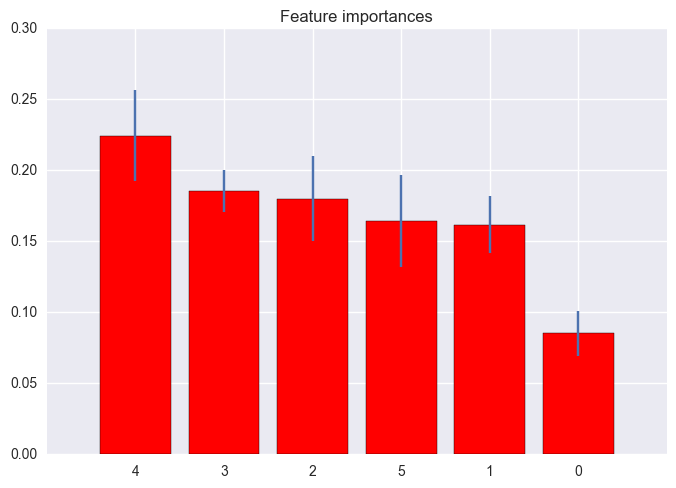

In [2]:
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
array = Input[['retweet_count', 'followers_count',  'friends_count', 'listed_count', 'statuses_count', 'favourites_count']].values
a = array[:,0:6]
b = array[:,5]

forest = ExtraTreesClassifier()

forest.fit(a, b)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(a.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(a.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(a.shape[1]), indices)
plt.xlim([-1, a.shape[1]])
plt.show()

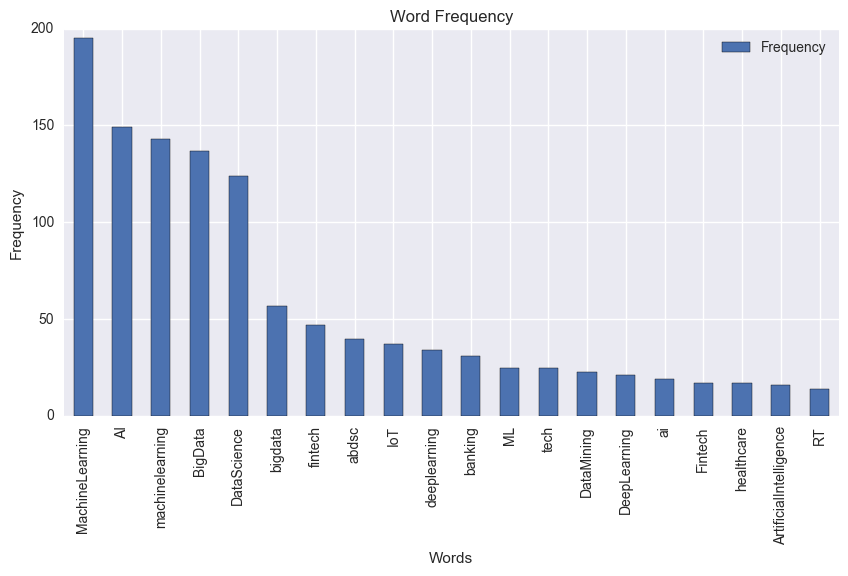

In [3]:
Input=pd.read_excel("C:\\Users\\Ruchi\\Desktop\\ML\\Data\\Final\\MLTweets.xlsx", encoding = 'iso-8859-1')
Input.head()

df_words= pd.DataFrame()

tags =Input[["tweet_hashtags"]]
for index,tag in tags.iterrows():
    words = [w
         for t in tag
             for w in str(t).replace("tweet_hashtags","").split(",")
                 if w != ""]
    df_words = df_words.append(words)
    
df_words.columns = ["words"]
word_freq = df_words.groupby(['words']).size()


df_word_freq = word_freq.to_frame()

df_word_freq.columns = ['Frequency']
df_word_freq = df_word_freq.sort_values('Frequency',ascending=0)

#Plot most common 20 word and its frequency in bar graph
from matplotlib import pyplot as plt
plt.figure()
df_word_freq_plot = df_word_freq.iloc[0:20].plot(kind='bar',title='Word Frequency',figsize=(10,5))
df_word_freq_plot.set_xlabel('Words')
df_word_freq_plot.set_ylabel('Frequency')
plt.show()

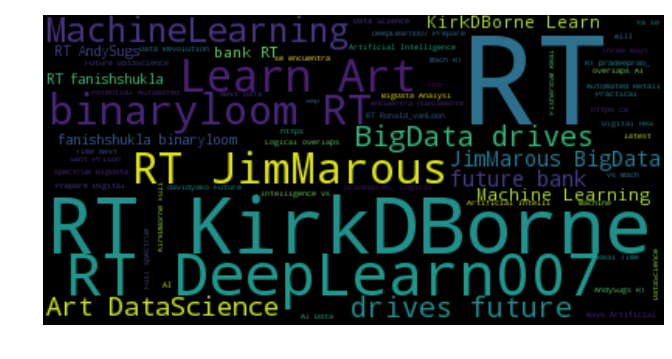

In [4]:
words = ""

type(words)

tags =Input[["text"]]
for index,tag in tags.iterrows():
    words = words + " " + tag.to_string().replace("text","")
    


from os import path
from wordcloud import WordCloud

d = path.dirname("C:\\Users\\Ruchi\\Desktop\\ML\\Data\\")

# Read the whole text.

# Generate a word cloud image
wordcloud = WordCloud().generate(words)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

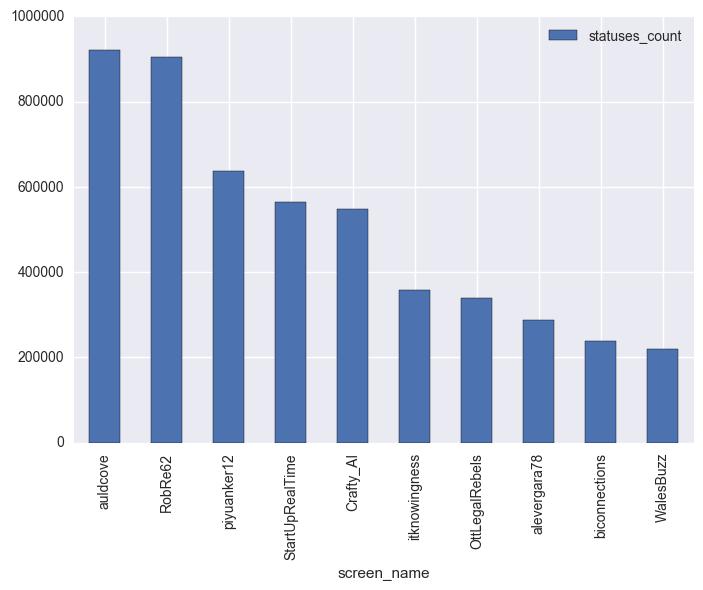

In [5]:
status_count_df = Input[["screen_name","statuses_count"]]
status_count_df = status_count_df.drop_duplicates(["screen_name"])
status_count_df=status_count_df.sort_values("statuses_count", ascending=False)
status_count_df.head(10).plot("screen_name","statuses_count",kind="bar")
plt.figure()
plt.show()

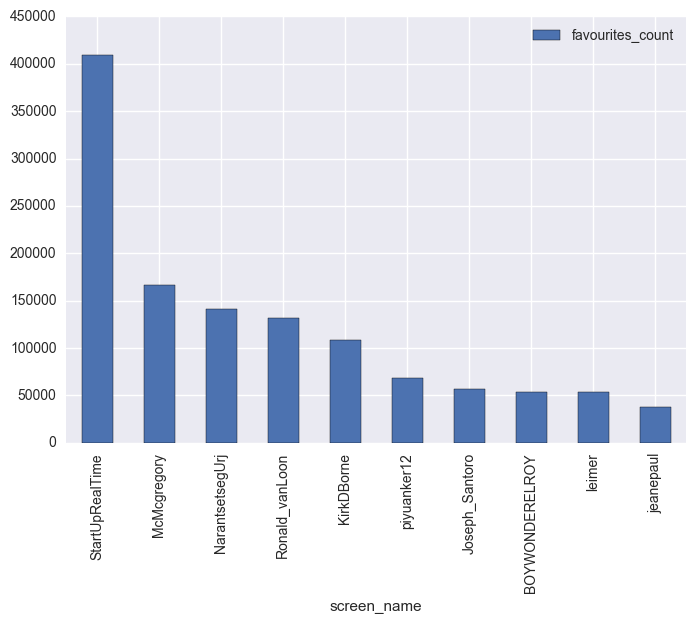

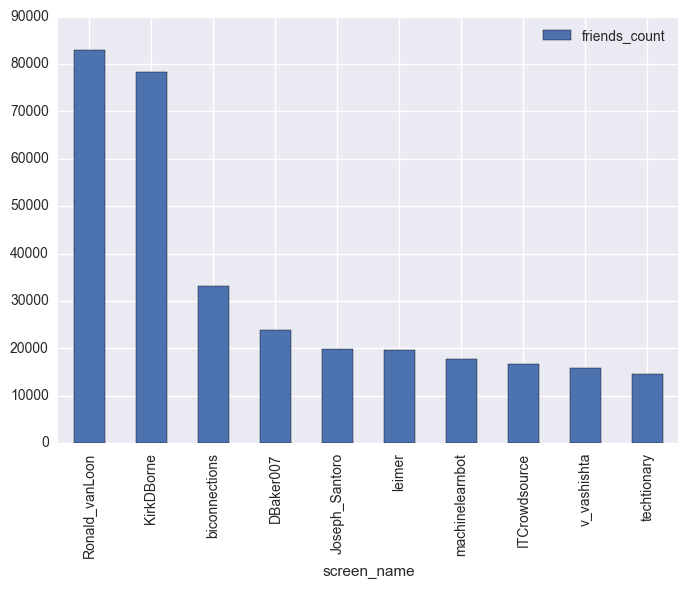

In [45]:
favourites_count_df = Input[["screen_name","favourites_count"]]
favourites_count_df = favourites_count_df.drop_duplicates(["screen_name"])
favourites_count_df = favourites_count_df.sort_values("favourites_count", ascending=False)
favourites_count_df.head(10).plot("screen_name","favourites_count",kind="bar")
plt.figure()
plt.show()


friends_count_df = Input[["screen_name","friends_count"]]
friends_count_df = friends_count_df.drop_duplicates(["screen_name"])
friends_count_df = friends_count_df.sort_values("friends_count", ascending=False)
friends_count_df.head(10).plot("screen_name","friends_count",kind="bar")
plt.figure()
plt.show()

In [38]:
import numpy as np
import pandas as pd
import scipy as spy
import seaborn as sns

Input=pd.read_excel("C:\\Users\\Ruchi\\Desktop\\ML\\Data\\Final\\MLTweets.xlsx", encoding = 'iso-8859-1')
Input.head()



keys= list(Input.columns)

from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
array = Input[['retweet_count', 'followers_count',  'friends_count', 'listed_count', 'statuses_count', 'favourites_count']].values
a = array[:,0:6]
b = array[:,5]

forest = ExtraTreesClassifier()

forest.fit(a, b)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



X=Input[['retweet_count', 'followers_count',  'friends_count', 'listed_count', 'statuses_count', 'favourites_count']]
X.count()

Y=Input['id']
Y.count()


X2=Input[['statuses_count','favourites_count','friends_count']]
X_train=X2.as_matrix()
X2.shape
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.10)

#Y = pd.DataFrame(Y)
Y_train=y_train.as_matrix()
Y_train=np.ravel(Y_train)
Y_train.shape = (365,1)
Y_train.shape



from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


forest = RandomForestClassifier(n_estimators=50, random_state=15325)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

multi_target_forest.fit(X_train, Y_train)
multi_target_forest.predict(X_test)


array([[294],
       [166],
       [ 38],
       [390],
       [357],
       [ 88],
       [ 33],
       [115],
       [389],
       [245],
       [333],
       [  7],
       [169],
       [  4],
       [ 87],
       [349],
       [161],
       [381],
       [ 86],
       [322],
       [390],
       [131],
       [259],
       [278],
       [401],
       [148],
       [  4],
       [177],
       [131],
       [265],
       [ 67],
       [238],
       [ 96],
       [349],
       [ 38],
       [296],
       [191],
       [ 48],
       [  3],
       [238],
       [358]], dtype=int64)

In [39]:
Input.iloc[294]

id                                                                     294
tweet_id                                                859235560996696064
created_at                                  Tue May 02 02:38:16 +0000 2017
tweet_hashtags                        ,MachineLearning,BigData,DataScience
text                     7 Tips for #MachineLearning Success: https://t...
tweet_favourite_count                                                    0
retweet_count                                                            2
user_id                                                          534563976
user_description         The Principal Data Scientist at @BoozAllen, Ph...
display_name                                                    Kirk Borne
screen_name                                                     KirkDBorne
followers_count                                                     147913
friends_count                                                        78230
listed_count             

In [40]:
Input.iloc[294].screen_name

'KirkDBorne'

In [41]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
clf = OneVsOneClassifier(LinearSVC(random_state=15325)).fit(X_train, Y_train).predict(X_test)
clf

C:\Users\Ruchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([140, 100,   6, 354,   6, 385,  36, 183, 390,  36,  96,   7, 198,
       146, 146,  36, 288, 123,  87, 100, 354,   6, 259,  49,   6, 290,
        87,   6,   6, 265, 280,   6,  96,  36,   6, 151,  66, 306, 385,
         6,   6], dtype=int64)

In [42]:
Input.iloc[140]

id                                                                     140
tweet_id                                                859228437818507008
created_at                                  Tue May 02 02:09:57 +0000 2017
tweet_hashtags                 ,DeepLearning,IoT,abdsc,BigData,DataScience
text                     #DeepLearning and it?s role in #IoT / Future C...
tweet_favourite_count                                                    2
retweet_count                                                            1
user_id                                                          534563976
user_description         The Principal Data Scientist at @BoozAllen, Ph...
display_name                                                    Kirk Borne
screen_name                                                     KirkDBorne
followers_count                                                     147911
friends_count                                                        78230
listed_count             

In [43]:
Input.iloc[140].screen_name

'KirkDBorne'